# Convolutional Neural Networks - Image Classification [using Tensorflow]

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

In [2]:
# Check tensorflow version
tf.__version__

'2.16.1'

### 2. LOADING DATASET

The dataset used is [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), which is a widely used benchmark dataset in the field of computer vision and machine learning. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It serves as a standard dataset for training and evaluating machine learning algorithms, particularly for image classification tasks.

The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

In [3]:
# Loading the dataset from keras library
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Check imported dataset details
print("X Train: {} \nX Test: {} \ny Train: {} \ny test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (50000, 32, 32, 3) 
X Test: (10000, 32, 32, 3) 
y Train: (50000, 1) 
y test: (10000, 1)


As we see here, the dataset comprises 50,000 training images and 10,000 test images, each with a resolution of 32x32 pixels and three color channels (RGB). Additionally, the dataset includes corresponding labels for both training and test sets, each represented as a single column array.

### 3. IMAGE PREPROCESSING

Since we are dealing with a CNN model with multi class predictions, the true labels should be compatible with the output of CNN model. Thus, we have to convert the class labels into one-hot encoded vectors to represent them in a format that's more suitable for training a neural network.

In [5]:
# Convert target data to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Implementing data augmentation and image transformations to avoid over fitting. This helps to increase the diversity of the dataset and improve the generalization ability of the CNN model.

Transformations of training images are:
- Scale the pixel values of the images to be in the range [0, 1].
- Randomly apply shear transformations to the images.
- Randomly apply zoom transformations to the images.
- Randomly flip images horizontally.

In [6]:
# Initialize ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
# Generate augmented training data batches
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size = 32
)

To avoid data leakage and over fitting, only pixel scaling is implemented on testing images.

In [8]:
# Initialize ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [9]:
# Generate augmented testing data batches
test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size = 32
)

### 4. BUILDING CNN MODEL

#### Initializing CNN model

In [10]:
# Initializing cnn model
cnn = Sequential()

#### Input layer

In [11]:
# Add input layer
cnn.add(Input(shape=(32, 32, 3)))

#### Convolutional layers

We use 2 convolutional layers with an increasing number of filters to allow the model to capture more complex patterns in the images.

Convolutional layers are followed by max pooling layers to reduce the spatial dimensions of the feature maps and help in controlling overfitting by providing translation invariance.

In [12]:
# Add first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"))

In [13]:
# Add first pooling layer
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

In [14]:
# Add second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"))

In [15]:
# Add second pooling layer
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))

#### Flattening layer

This layer flattens the output from the convolutional layers into a one-dimensional vector, preparing it to be inputted into the dense layers.

In [16]:
# Add flattening layer
cnn.add(Flatten())

#### Fully connected layers

We use a dense layer as a fully connected layer to learn high-level features from the flattened input. Another dense layer is also added to further refining the learned features.


In [17]:
# Add first fully connected layer
cnn.add(Dense(units=128, activation="relu"))

In [18]:
# Add second fully connected layer
cnn.add(Dense(units=64, activation="relu"))

#### Output layer

The final dense layer has 10 units (equal to the number of classes in the classification task) with a softmax activation, producing probabilities for each class.

In [19]:
# Add output layer
cnn.add(Dense(units=10, activation="softmax"))

### 5. TRAINING CNN MODEL

#### Compile CNN model

In [20]:
# Compiling the sequential model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall", "f1_score"])

#### Train CNN model

In [21]:
# Train the model using the generated and augmented data
history = cnn.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25
   7/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0728 - f1_score: 0.0427 - loss: 2.3157 - precision: 0.0000e+00 - recall: 0.0000e+00 

c:\Users\SinanWannous\anaconda3\envs\dl_course\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3554 - f1_score: 0.3468 - loss: 1.7428 - precision: 0.6073 - recall: 0.1213 - val_accuracy: 0.5760 - val_f1_score: 0.5655 - val_loss: 1.1877 - val_precision: 0.7400 - val_recall: 0.3999
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5709 - f1_score: 0.5673 - loss: 1.2069 - precision: 0.7348 - recall: 0.4037 - val_accuracy: 0.5903 - val_f1_score: 0.5798 - val_loss: 1.1580 - val_precision: 0.6960 - val_recall: 0.4813
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6277 - f1_score: 0.6254 - loss: 1.0587 - precision: 0.7576 - recall: 0.4914 - val_accuracy: 0.6531 - val_f1_score: 0.6447 - val_loss: 0.9919 - val_precision: 0.7668 - val_recall: 0.5393
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6566 - f1_score: 0.6554 - loss: 0.9758 - precision: 0.7775 - recall: 0.5362 - val_accuracy: 0.6878 - val_f1_score: 0.6857 - val_loss: 0.8975 - val_precision: 0.7843 - val_re

### 6. PERFORMANCE ANALYSIS

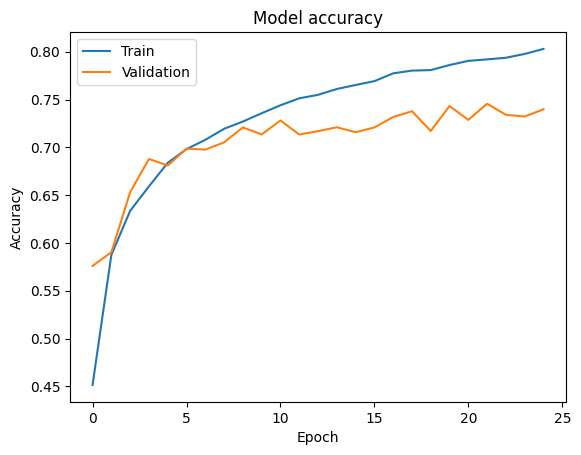

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The results highlights the following points:
- The training accuracy steadily increases as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data.
- The validation accuracy initially increases as the model learns more representations from the training data.
- However, after reaching a peak around the 9th epoch, the validation accuracy starts to fluctuate. This might indicate that the model is beginning to overfit, as it fails to generalize well to unseen data.
- The gap between training and validation accuracy starts to widen after a certain point, indicating increasing overfitting as training progresses.
- To address overfitting, techniques such as regularization (e.g., dropout, weight decay), early stopping, or data augmentation could be applied.

In summary, while the model shows promising learning capabilities initially, it demonstrates signs of overfitting later in the training process. Further optimization and regularization techniques are needed to improve generalization performance.